#Gold & Silver Price prediction using Arima

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, matplotlib

#pandas= data Manipulation and analysis
#Arima = Forecasting
#matplotlib= data visualization


In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.3 MB/s 
     |████████████████████████████████| 9.5 MB 30.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=0a013659c9b1cfcfcbd64d3a62d0f2b6cc92b6d4387e8f505e7a19cc964eb128
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset & Exploring it

In [4]:
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
gold_data = pdr.get_data_yahoo('GC=F', start='2016-09-01', end='2021-09-01')
gold_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-01,1305.300049,1313.099976,1301.500000,1312.199951,1312.199951,225
2016-09-02,1309.599976,1326.699951,1309.199951,1322.099976,1322.099976,55
2016-09-06,1323.300049,1349.400024,1323.199951,1349.400024,1349.400024,46
2016-09-07,1348.400024,1350.500000,1343.900024,1344.300049,1344.300049,14
2016-09-08,1344.800049,1345.400024,1335.699951,1336.800049,1336.800049,30


In [ ]:
#read_csv function from pandas

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1245 entries, 2016-09-01 to 2021-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1245 non-null   float64
 1   High       1245 non-null   float64
 2   Low        1245 non-null   float64
 3   Close      1245 non-null   float64
 4   Adj Close  1245 non-null   float64
 5   Volume     1245 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.1 KB


In [6]:
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,1462.488273,1468.948757,1455.768515,1462.390924,1462.390924,5971.038554
std,249.045590,251.936638,246.164785,249.177872,249.177872,33619.074491
min,1126.900024,1132.800049,1123.900024,1127.800049,1127.800049,0.000000
25%,1267.400024,1270.199951,1262.000000,1266.500000,1266.500000,34.000000
50%,1326.800049,1331.099976,1322.599976,1326.000000,1326.000000,146.000000
75%,1723.699951,1730.000000,1711.000000,1722.300049,1722.300049,521.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


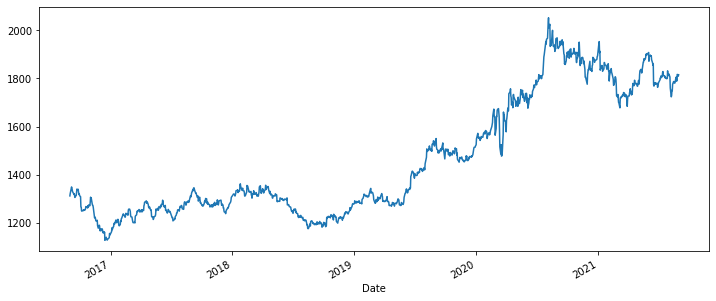

In [7]:
gold_data.Close.plot(figsize=(12,5))

# Understanding Auto Regressive Integrated Moving Average (ARIMA)

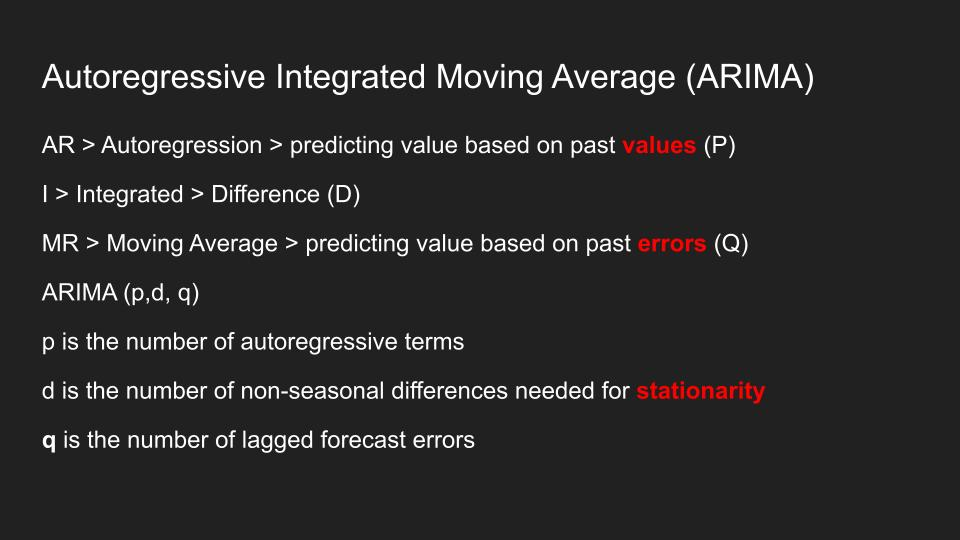

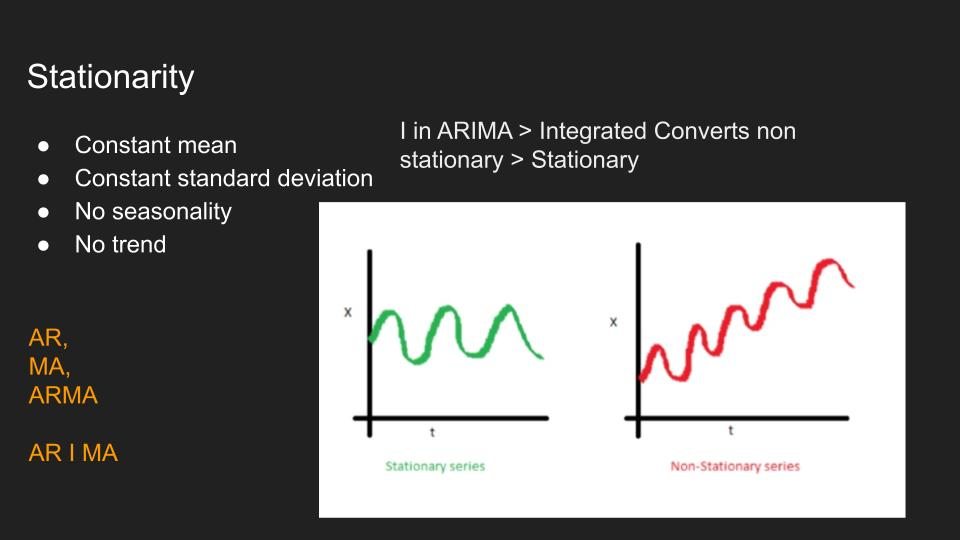

#Finding Order (P,D,Q)

In [8]:
from pmdarima import auto_arima

In [9]:
df = gold_data.dropna()
best_order = auto_arima(df['Close'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10207.086, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10202.895, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10204.651, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10204.667, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10201.849, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10206.226, Time=0.83 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.787 seconds


## Data Preperation-Train Test Split

In [10]:
df = pd.DataFrame(gold_data['Close'].tolist())
df.columns = ['Close']
df

,Close
0,1312.199951
1,1322.099976
2,1349.400024
3,1344.300049
4,1336.800049
...,...
1240,1788.199951
1241,1792.199951
1242,1816.599976
1243,1809.000000


In [11]:
train,test = df[0:int(len(df)*0.85)],df[int(len(df)*0.85):]

In [12]:
train.shape,test.shape

((1058, 1), (187, 1))

In [13]:
df.shape

(1245, 1)

## Creating ARIMA Model

In [14]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(0,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1058
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4289.283
Date:                Sun, 19 Sep 2021   AIC                           8580.565
Time:                        19:02:39   BIC                           8585.529
Sample:                             0   HQIC                          8582.447
                               - 1058                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       195.9946      3.533     55.479      0.000     189.070     202.919
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):              4177.18
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               5.14   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

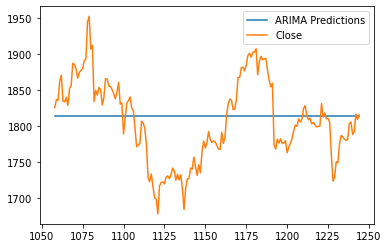

In [15]:
start=len(train)               ##Example= y1,y2,y3 > y3-y2,y2-y1 (Total elements is 3 but after using Arima its 2 > data- 1 
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

### Error

In [16]:
## ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

56.78291598058405


In [17]:
df.describe()

,Close
count,1245.000000
mean,1462.390924
std,249.177872
min,1127.800049
25%,1266.500000
50%,1326.000000
75%,1722.300049
max,2051.500000


##More Forecast Graphs

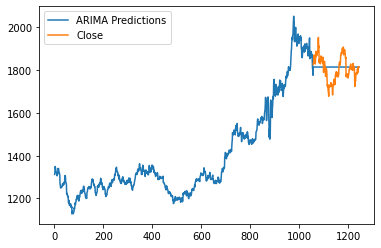

In [18]:
start=1
end=1245
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

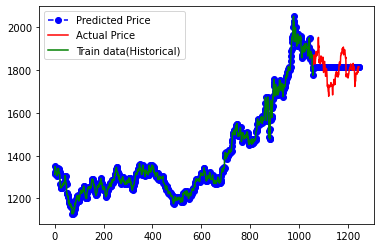

In [19]:
start=1
end=1245
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



## 30 days into the future

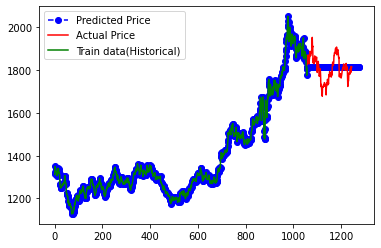

In [20]:
### 30 days into the future

start=1
end=1275
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')

